# Test Data affaires maritime


In [2]:
url='https://www.data.gouv.fr/fr/datasets/r/69d7461e-9849-4641-a5c6-fa90cee2f56b'


## Analyse

In [3]:
#Import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


%matplotlib inline

import os
sns.set_style(style = 'whitegrid')

### First step with the dataframe

In [4]:
data = pd.read_csv(url)
data.head()

,num_imo,nom_navire,num_immat_francais,num_mmsi,chantier_construction,annee_construction,puissance_administrative,puissance_propulsive,longueur_hors_tout,jauge_londres,armateur_exploitant,materiau_coque,date_francisation,type_carburant,quartier,genre_navigation,date_debut_pa_commerce,date_fin_pa_commerce,date_debut_pa_peche_culture,date_fin_pa_peche_culture
0,NaN,YOUPI ONE,104641,227062810.0,NaN,1971,37.0,37.0,"6,03","2,32",NaN,PLASTIQUE,2000-10-25,ESSENCE,TOULON,Petite pêche,NaN,NaN,2018-01-01,NaN
1,NaN,TOINOU,142359,227157520.0,NaN,1972,147.0,147.0,"7,87","4,71",NaN,PLASTIQUE,2002-08-13,GAZOLE,SETE,Petite pêche,NaN,NaN,2018-01-01,NaN
2,NaN,LADY ALASKA,149253,227156540.0,NORVEGE,1970,129.0,129.0,"7,1","1,36",NaN,POLYESTER EPOXY,2011-04-04,GAZOLE,TOULON,Petite pêche,NaN,NaN,2018-09-01,NaN
3,NaN,CHEYENNE,153384,NaN,NaN,1968,147.0,147.0,"7,9","4,23",NaN,PLASTIQUE,2016-07-20,ESSENCE,SETE,Petite pêche,NaN,NaN,2018-01-01,NaN
4,NaN,ELSAJO,153893,227749480.0,NaN,1967,74.0,74.0,"9,77","3,34",NaN,PLASTIQUE,2004-06-11,GAZOLE,SETE,Petite pêche,NaN,NaN,2018-01-01,NaN


In [5]:
#Check the shape to quickly know the size of the dataset
nrow, ncol = data.shape
nrow, ncol

(10372, 20)

In [6]:
#We can have an overview on the data categories type 
#and if there is Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_imo                      664 non-null    float64
 1   nom_navire                   10372 non-null  object 
 2   num_immat_francais           10372 non-null  int64  
 3   num_mmsi                     6211 non-null   float64
 4   chantier_construction        3500 non-null   object 
 5   annee_construction           10372 non-null  int64  
 6   puissance_administrative     10175 non-null  float64
 7   puissance_propulsive         10174 non-null  float64
 8   longueur_hors_tout           10372 non-null  object 
 9   jauge_londres                7454 non-null   object 
 10  armateur_exploitant          78 non-null     object 
 11  materiau_coque               10372 non-null  object 
 12  date_francisation            9832 non-null   object 
 13  type_carburant  

Here it would be valuable to change the data type for some columns.
To make the statistics analysis easier.
for example date_debut_pa_peche_culture or date_fin_pa_commerce must be a datetime type of value. So now we can to time analysis on this columns


In [7]:
#I convert the column "date_debut_pa_peche_culture" in datetime type
data['date_debut_pa_peche_culture'] = pd.to_datetime(data['date_debut_pa_peche_culture'])

### What ID can we use ?

In [8]:
len(data['num_immat_francais'].unique()) == nrow #The number of unique value is equal to the total number of value

True

"num_immat_francais" most likely to be the best ID to use because the values are consistant, unique and with no missing value. 

In [9]:
#I set-up the column num_immat_francais as an index
data_with_index = data.set_index("num_immat_francais")
data_with_index.head()

,num_imo,nom_navire,num_mmsi,chantier_construction,annee_construction,puissance_administrative,puissance_propulsive,longueur_hors_tout,jauge_londres,armateur_exploitant,materiau_coque,date_francisation,type_carburant,quartier,genre_navigation,date_debut_pa_commerce,date_fin_pa_commerce,date_debut_pa_peche_culture,date_fin_pa_peche_culture
num_immat_francais,,,,,,,,,,,,,,,,,,,
104641,NaN,YOUPI ONE,227062810.0,NaN,1971,37.0,37.0,"6,03","2,32",NaN,PLASTIQUE,2000-10-25,ESSENCE,TOULON,Petite pêche,NaN,NaN,2018-01-01,NaN
142359,NaN,TOINOU,227157520.0,NaN,1972,147.0,147.0,"7,87","4,71",NaN,PLASTIQUE,2002-08-13,GAZOLE,SETE,Petite pêche,NaN,NaN,2018-01-01,NaN
149253,NaN,LADY ALASKA,227156540.0,NORVEGE,1970,129.0,129.0,"7,1","1,36",NaN,POLYESTER EPOXY,2011-04-04,GAZOLE,TOULON,Petite pêche,NaN,NaN,2018-09-01,NaN
153384,NaN,CHEYENNE,NaN,NaN,1968,147.0,147.0,"7,9","4,23",NaN,PLASTIQUE,2016-07-20,ESSENCE,SETE,Petite pêche,NaN,NaN,2018-01-01,NaN
153893,NaN,ELSAJO,227749480.0,NaN,1967,74.0,74.0,"9,77","3,34",NaN,PLASTIQUE,2004-06-11,GAZOLE,SETE,Petite pêche,NaN,NaN,2018-01-01,NaN


### Data rules check

Data rules: puissance_administrative and puissance_propulsive are supposed to be equal
We can check and extract the non consistant data:

In [10]:
list_equal=data_with_index['puissance_administrative'] == data_with_index['puissance_propulsive']

In [11]:
data_with_index.insert(loc = 7, column="puissance_equal", value = list_equal , allow_duplicates = True)


In [13]:
#Here is the list of id that have a puissance_administrative different from the puissance_propulsive
data_with_index[data_with_index["puissance_equal"] == False].index

Int64Index([212109, 653469, 661019, 733546, 779250, 784010, 833204, 842366,
            878346, 934569,
            ...
            934971, 935131, 935145, 935196, 935342, 935545, 935554, 935633,
            935618, 935772],
           dtype='int64', name='num_immat_francais', length=881)

### Categorical data analysis

I will analyse some of the categorical data of the dataset.

In [14]:
#creation separate dataframe for the categorical data
data_cat = data_with_index[['materiau_coque','chantier_construction', 'type_carburant', 'quartier', 'genre_navigation']].copy()
data_cat.head(2)

,materiau_coque,chantier_construction,type_carburant,quartier,genre_navigation
num_immat_francais,,,,,
104641,PLASTIQUE,NaN,ESSENCE,TOULON,Petite pêche
142359,PLASTIQUE,NaN,GAZOLE,SETE,Petite pêche


In [15]:
data_cat["materiau_coque"].unique() #Check all the categories

array(['PLASTIQUE', 'POLYESTER EPOXY', 'BOIS', 'BOIS MOULE', 'METAL',
       'AUTRES', 'AG/4 - ALU', 'CONTREPLAQUE', 'ALLIAGE LEGER',
       'BOIS MASSIF', 'PNEUMATIQUE', 'POLYETHYLENE', 'ACIER',
       'PLASTIQUE SANDWICH', 'ACIER / INOX'], dtype=object)

In [16]:
len(data_cat["materiau_coque"].unique()) #How many of them ?

15

In [17]:
data_cat["materiau_coque"].nunique() #How many of them ? Withount nan value

15

materiau_coque doesn't have nan value. So we dont'need to handle that here.
But its different for chantier_construction. 
So we can check the number precise amount of nan value like this

In [18]:
data_cat['chantier_construction'].isnull().sum()

6872

In [19]:
data_cat['chantier_construction'].isnull().sum()/ nrow
#Let's multiple by 100 and keep only 1 decimal places
(data_cat['chantier_construction'].isnull().sum()/ nrow).round(3)*100

66.3

66.3% of nan value ! We should find a way to solve the problem. Many solution are available depending of the data:
fill this gap with "Dont know" 
fill this gap with the most common value
fill this gap depending of the value of other columns
ignore the collumn ect...


#### Frequency Distribution

We have a good overview of the materiau_coque in use
Platic and Metal are the most common used.
Followed by Polyester, Wood, and Aluminium

[Text(0, 0, 'PLASTIQUE'),
 Text(0, 0, 'POLYESTER EPOXY'),
 Text(0, 0, 'BOIS'),
 Text(0, 0, 'BOIS MOULE'),
 Text(0, 0, 'METAL'),
 Text(0, 0, 'AUTRES'),
 Text(0, 0, 'AG/4 - ALU'),
 Text(0, 0, 'CONTREPLAQUE'),
 Text(0, 0, 'ALLIAGE LEGER'),
 Text(0, 0, 'BOIS MASSIF'),
 Text(0, 0, 'PNEUMATIQUE'),
 Text(0, 0, 'POLYETHYLENE'),
 Text(0, 0, 'ACIER'),
 Text(0, 0, 'PLASTIQUE SANDWICH'),
 Text(0, 0, 'ACIER / INOX')]

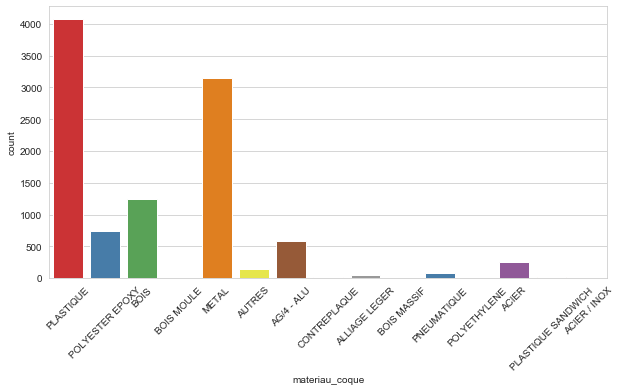

In [20]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x = 'materiau_coque', data = data, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

We can also look at the relationship between this variable and annee_construction for example. Here I use my instinct, to assume that the manufacture year of the boat must have an impact on what is use to build it. May be because of technololgy improvment ect...

In [21]:
#I add my dependent variable in the dataset. 
data_cat['annee_construction'] = data_with_index.loc[data_cat.index, 'annee_construction'].copy()
len(data_cat.columns)

6

I use boxplot to be able to have a summary of the distribution of the data. 

[Text(0, 0, 'PLASTIQUE'),
 Text(0, 0, 'POLYESTER EPOXY'),
 Text(0, 0, 'BOIS'),
 Text(0, 0, 'BOIS MOULE'),
 Text(0, 0, 'METAL'),
 Text(0, 0, 'AUTRES'),
 Text(0, 0, 'AG/4 - ALU'),
 Text(0, 0, 'CONTREPLAQUE'),
 Text(0, 0, 'ALLIAGE LEGER'),
 Text(0, 0, 'BOIS MASSIF'),
 Text(0, 0, 'PNEUMATIQUE'),
 Text(0, 0, 'POLYETHYLENE'),
 Text(0, 0, 'ACIER'),
 Text(0, 0, 'PLASTIQUE SANDWICH'),
 Text(0, 0, 'ACIER / INOX')]

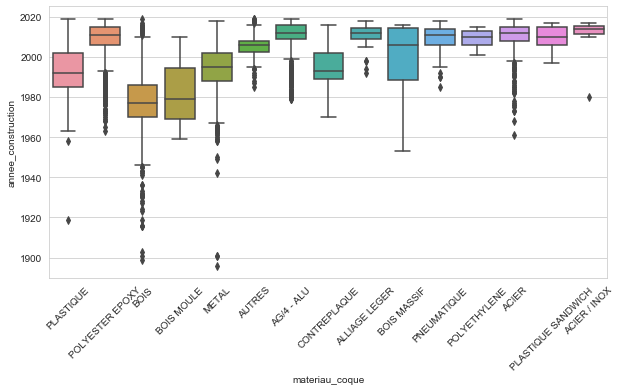

In [298]:
plt.figure(figsize=(10,5))
chart3 = sns.boxplot(data = data_cat, x='materiau_coque', y='annee_construction')
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45)

We can have first conclusion about this data:

Platique and metal are a simmilar distributivity. However the outlier show that the metal have been using few time earlier than the platic but the mass production of metal boat is slightly newer than plastic construction.

We can assume that "ACIER/INOX" is the newest technology and really appears after 2010.

The Wood (Bois) is the oldest technology and it seems to disappear as the "Autres" and the "BOIS MOULE" categories

Construction in ALU has a promising future and its share could grow in the years to come. 

We can do the same analysis to check the categorical data and how they are spread in the dataset. Would be interinsting to do the same for chantier_construction, type_carburant, quartier, genre_navigation.


[Text(0, 0, 'PLASTIQUE'),
 Text(0, 0, 'POLYESTER EPOXY'),
 Text(0, 0, 'BOIS'),
 Text(0, 0, 'BOIS MOULE'),
 Text(0, 0, 'METAL'),
 Text(0, 0, 'AUTRES'),
 Text(0, 0, 'AG/4 - ALU'),
 Text(0, 0, 'CONTREPLAQUE'),
 Text(0, 0, 'ALLIAGE LEGER'),
 Text(0, 0, 'BOIS MASSIF'),
 Text(0, 0, 'PNEUMATIQUE'),
 Text(0, 0, 'POLYETHYLENE'),
 Text(0, 0, 'ACIER'),
 Text(0, 0, 'PLASTIQUE SANDWICH'),
 Text(0, 0, 'ACIER / INOX')]

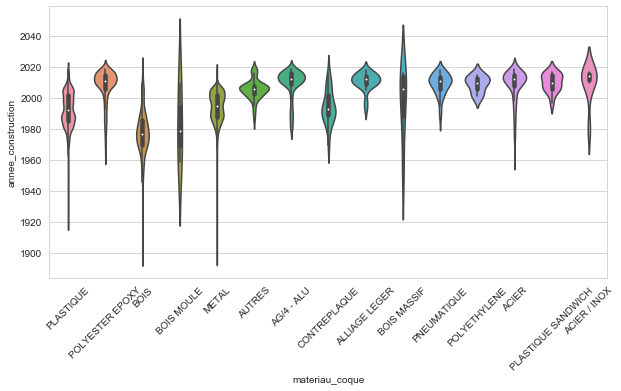

In [22]:
#Violin plot is an other way to have a look on the distributivity.
plt.figure(figsize=(10,5))
chart4 = sns.violinplot(data = data_cat, x='materiau_coque', y='annee_construction')
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=45)

[Text(0, 0, 'ESSENCE'),
 Text(0, 0, 'GAZOLE'),
 Text(0, 0, 'INCONNU'),
 Text(0, 0, 'ELECTRICITE'),
 Text(0, 0, 'MIXTE')]

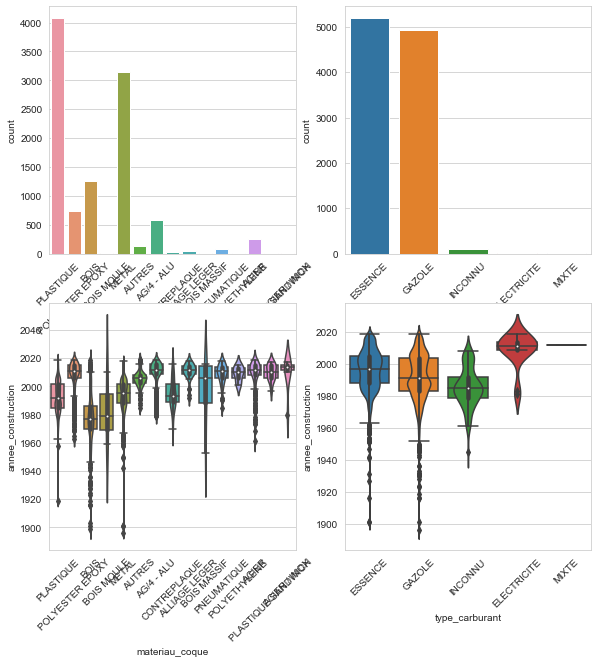

In [23]:
#we can also merge them in the same figure
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
chart5 = sns.countplot(data = data_cat, x = 'materiau_coque', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
chart6 = sns.countplot(data = data_cat, x = 'type_carburant', ax=ax2)

ax4 = fig.add_subplot(2,3,4)
chart7 = sns.boxplot(data = data_cat, x = 'materiau_coque', y = 'annee_construction' , ax=ax4)
chart8 = sns.violinplot(data = data_cat, x = 'materiau_coque', y = 'annee_construction' , ax=ax4)
#sns.swarmplot(data = data_cat, x = 'materiau_coque', y='annee_construction', color = 'k', alpha = 0.4, ax=ax4  )

ax5 = fig.add_subplot(2,3,5)
chart9 = sns.boxplot(data = data_cat, x = 'type_carburant', y = 'annee_construction', ax=ax5)
chart10 = sns.violinplot(data = data_cat, x = 'type_carburant', y = 'annee_construction', ax=ax5)
#sns.swarmplot(data = data_cat, x = 'type_carburant', y='annee_construction', color = 'k', alpha = 0.4, ax=ax5  )

chart5.set_xticklabels(chart5.get_xticklabels(), rotation=45)
chart6.set_xticklabels(chart6.get_xticklabels(), rotation=45)
chart7.set_xticklabels(chart7.get_xticklabels(), rotation=45)
chart8.set_xticklabels(chart8.get_xticklabels(), rotation=45)
chart9.set_xticklabels(chart9.get_xticklabels(), rotation=45)
chart10.set_xticklabels(chart10.get_xticklabels(), rotation=45)

We can do the same analysis to check the categorical data and how they are spread in the dataset.
Would be interisting to do the same for chantier_construction, type_carburant, quartier, genre_navigation


# Numerical Data Analysis

I want here to analyze the numerical data correlations. First I will check the correlation between all the numerical data and then I will encode the categorical features materiau_coque et type_carburant to be able to check proccible correlation

In [24]:
#Assigning right type to the columns
data_with_index['longueur_hors_tout'] = data_with_index['longueur_hors_tout'].str.replace(',', '').astype(float)
data_with_index['jauge_londres'] = data_with_index['jauge_londres'].str.replace(',', '').astype(float)
data_with_index["quartier"] = data_with_index["quartier"].astype('category')

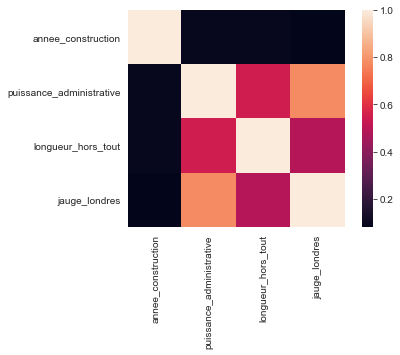

In [25]:
corrmat = data_with_index.drop(columns=["puissance_equal", "puissance_propulsive", "num_mmsi", "num_imo"]).corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

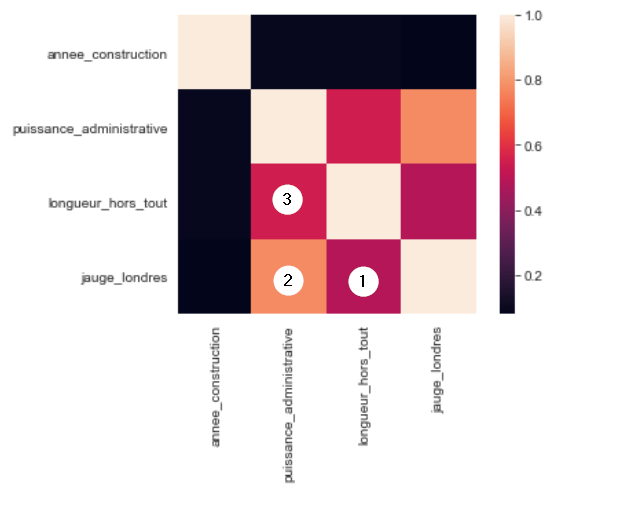

In [26]:
#Display Image
from IPython.display import Image
Image("picture.png")

1. longueur_hors_tout and jauge_londres
    Weak correlation between this variables
    
2. puissance_admninistrative and jauge_londres
    Strong correlation between this variables
    
3. puissance_admninistrative and longueur_hors_tout
    Average correlation between this variables
    
Now we need to investigate more because it could be positively or it could be negative correlated.

We will continue by adding the fuel type and check correlation. 

In [27]:
#Encoding type_carburant to make it numerical
data_with_index_encoded = data_with_index.copy()
data_with_index_encoded = pd.get_dummies(data_with_index_encoded, columns=['type_carburant'], prefix = ['type_carburant'])
data_with_index_encoded.head()


,num_imo,nom_navire,num_mmsi,chantier_construction,annee_construction,puissance_administrative,puissance_propulsive,puissance_equal,longueur_hors_tout,jauge_londres,...,genre_navigation,date_debut_pa_commerce,date_fin_pa_commerce,date_debut_pa_peche_culture,date_fin_pa_peche_culture,type_carburant_ELECTRICITE,type_carburant_ESSENCE,type_carburant_GAZOLE,type_carburant_INCONNU,type_carburant_MIXTE
num_immat_francais,,,,,,,,,,,,,,,,,,,,,
104641,NaN,YOUPI ONE,227062810.0,NaN,1971,37.0,37.0,True,603.0,232.0,...,Petite pêche,NaN,NaN,2018-01-01,NaN,0,1,0,0,0
142359,NaN,TOINOU,227157520.0,NaN,1972,147.0,147.0,True,787.0,471.0,...,Petite pêche,NaN,NaN,2018-01-01,NaN,0,0,1,0,0
149253,NaN,LADY ALASKA,227156540.0,NORVEGE,1970,129.0,129.0,True,71.0,136.0,...,Petite pêche,NaN,NaN,2018-09-01,NaN,0,0,1,0,0
153384,NaN,CHEYENNE,NaN,NaN,1968,147.0,147.0,True,79.0,423.0,...,Petite pêche,NaN,NaN,2018-01-01,NaN,0,1,0,0,0
153893,NaN,ELSAJO,227749480.0,NaN,1967,74.0,74.0,True,977.0,334.0,...,Petite pêche,NaN,NaN,2018-01-01,NaN,0,0,1,0,0


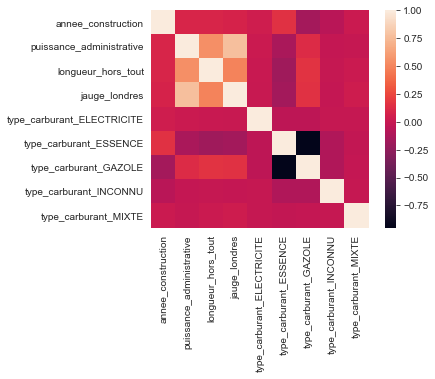

In [28]:
corrmat = data_with_index_encoded.drop(columns=["puissance_equal", "puissance_propulsive", "num_mmsi", "num_imo"]).corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

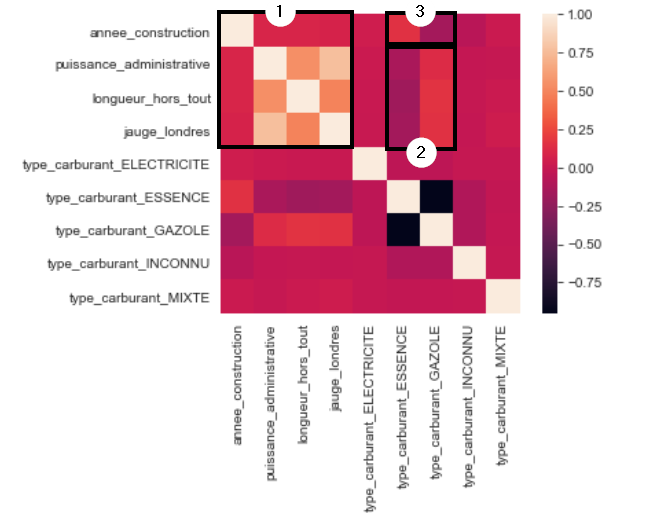

In [29]:
#Display Image
from IPython.display import Image
Image("picture2.png")

1. Previous correlation heat map

2. ESSENCE negatively affect annee_construction
   GAZOLE positively affect annee_construction

3. ESSENCE positively affect annee_construction
   GAZOLE negatively affect annee_construction
   
There is an interesting correlation here. Even is the correlation is weak we know now that the type of fuel can be use to help to predict one of the other features.

We continue with the analysis of materiau_coque. With our previous categorical analysis of this feature we know only PLASTIQUE, POLYESTER EPOXY, BOIS, METAL are relevante to add in the heat map here.

In [30]:
#Encoding type_carburant to make it numerical
data_with_index_encoded = pd.get_dummies(data_with_index_encoded, columns=['materiau_coque'], prefix = ['materiau_coque'])
data_with_index_encoded.head()

,num_imo,nom_navire,num_mmsi,chantier_construction,annee_construction,puissance_administrative,puissance_propulsive,puissance_equal,longueur_hors_tout,jauge_londres,...,materiau_coque_BOIS,materiau_coque_BOIS MASSIF,materiau_coque_BOIS MOULE,materiau_coque_CONTREPLAQUE,materiau_coque_METAL,materiau_coque_PLASTIQUE,materiau_coque_PLASTIQUE SANDWICH,materiau_coque_PNEUMATIQUE,materiau_coque_POLYESTER EPOXY,materiau_coque_POLYETHYLENE
num_immat_francais,,,,,,,,,,,,,,,,,,,,,
104641,NaN,YOUPI ONE,227062810.0,NaN,1971,37.0,37.0,True,603.0,232.0,...,0,0,0,0,0,1,0,0,0,0
142359,NaN,TOINOU,227157520.0,NaN,1972,147.0,147.0,True,787.0,471.0,...,0,0,0,0,0,1,0,0,0,0
149253,NaN,LADY ALASKA,227156540.0,NORVEGE,1970,129.0,129.0,True,71.0,136.0,...,0,0,0,0,0,0,0,0,1,0
153384,NaN,CHEYENNE,NaN,NaN,1968,147.0,147.0,True,79.0,423.0,...,0,0,0,0,0,1,0,0,0,0
153893,NaN,ELSAJO,227749480.0,NaN,1967,74.0,74.0,True,977.0,334.0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
data_with_index_encoded.columns

Index(['num_imo', 'nom_navire', 'num_mmsi', 'chantier_construction',
       'annee_construction', 'puissance_administrative',
       'puissance_propulsive', 'puissance_equal', 'longueur_hors_tout',
       'jauge_londres', 'armateur_exploitant', 'date_francisation', 'quartier',
       'genre_navigation', 'date_debut_pa_commerce', 'date_fin_pa_commerce',
       'date_debut_pa_peche_culture', 'date_fin_pa_peche_culture',
       'type_carburant_ELECTRICITE', 'type_carburant_ESSENCE',
       'type_carburant_GAZOLE', 'type_carburant_INCONNU',
       'type_carburant_MIXTE', 'materiau_coque_ACIER',
       'materiau_coque_ACIER / INOX', 'materiau_coque_AG/4 - ALU',
       'materiau_coque_ALLIAGE LEGER', 'materiau_coque_AUTRES',
       'materiau_coque_BOIS', 'materiau_coque_BOIS MASSIF',
       'materiau_coque_BOIS MOULE', 'materiau_coque_CONTREPLAQUE',
       'materiau_coque_METAL', 'materiau_coque_PLASTIQUE',
       'materiau_coque_PLASTIQUE SANDWICH', 'materiau_coque_PNEUMATIQUE',
       'mat

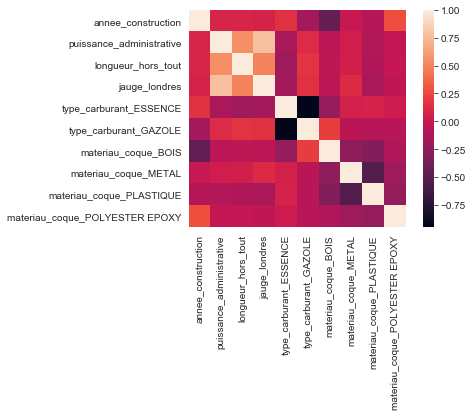

In [32]:
list_unused_columns = ['num_imo','nom_navire','num_mmsi','chantier_construction','puissance_propulsive','puissance_equal','armateur_exploitant','date_francisation','quartier','genre_navigation','date_debut_pa_commerce','date_fin_pa_commerce','date_debut_pa_peche_culture','date_fin_pa_peche_culture','type_carburant_ELECTRICITE', 'type_carburant_INCONNU','type_carburant_MIXTE','materiau_coque_ACIER','materiau_coque_ACIER / INOX','materiau_coque_AG/4 - ALU','materiau_coque_ALLIAGE LEGER','materiau_coque_AUTRES','materiau_coque_BOIS MASSIF','materiau_coque_BOIS MOULE','materiau_coque_CONTREPLAQUE','materiau_coque_PLASTIQUE SANDWICH','materiau_coque_PNEUMATIQUE','materiau_coque_POLYETHYLENE']
data_with_index_encoded2 = data_with_index_encoded.drop(columns=list_unused_columns)
corrmat = data_with_index_encoded2.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

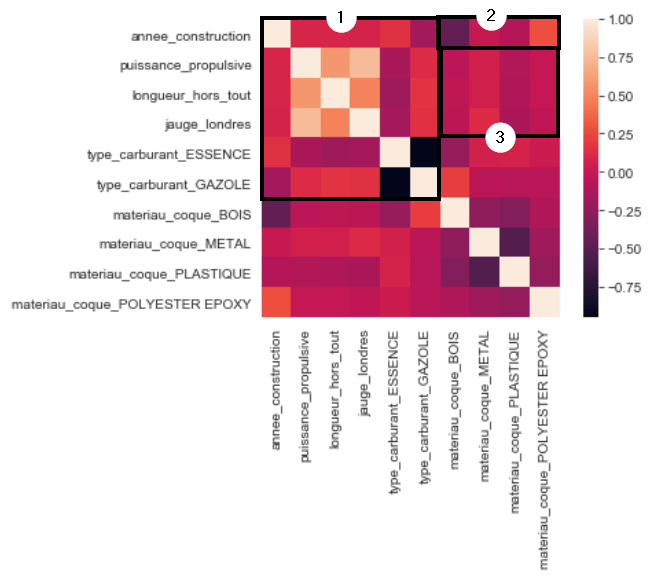

In [33]:
#Display Image
from IPython.display import Image
Image("picture3.png")

1. Previous correlation heat map

2. We can confirm my previous idead that the materiau_coque is corelated with the annee_construction. And even that POLYESTER EPOXY is the newer technology and BOIS the oldest

3. There is a correlation but it seems to weak to be noticeable especialy compare to the one with annee_construction

We continue the analysis of the relationship between the features in the dataset. So we want to plot each feature against the others, but we want to do this once without writing multiple for loops.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

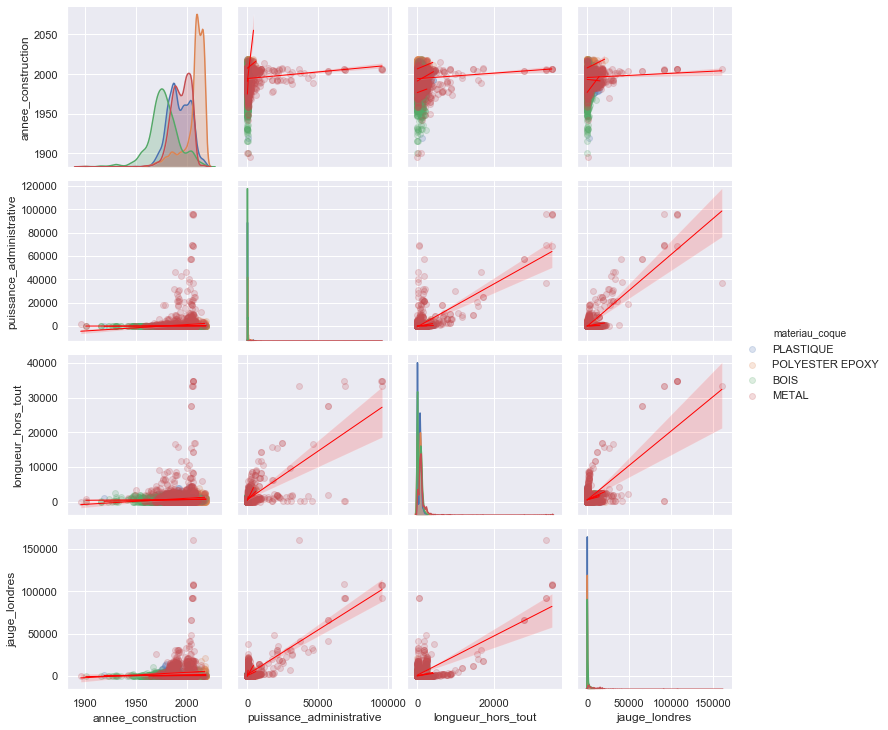

<Figure size 432x288 with 0 Axes>

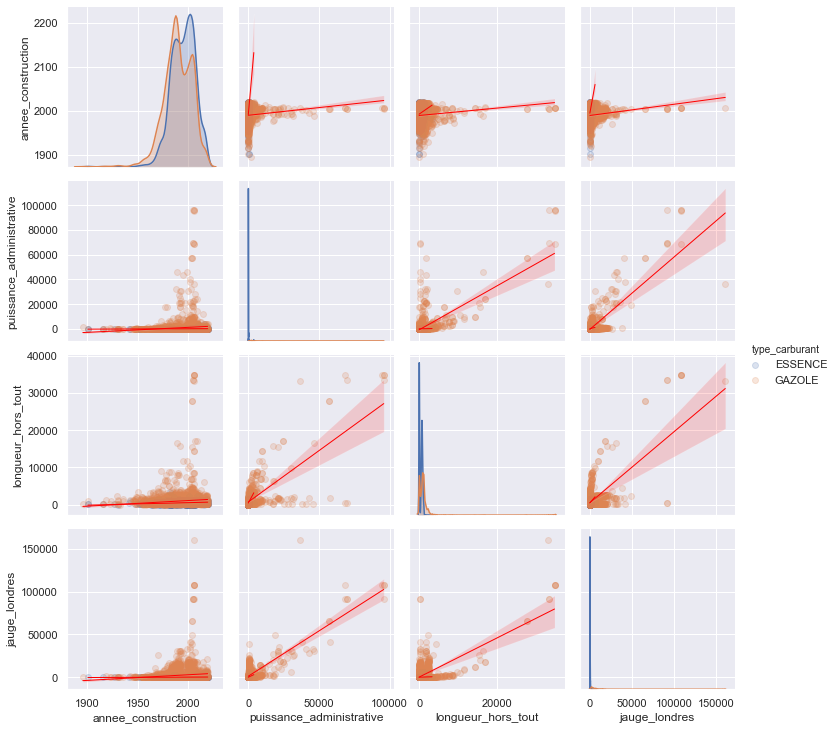

In [41]:
#scatterplot of the features
data_scatterplot = data_with_index.copy()
data_scatterplot = data_scatterplot[(data_with_index['materiau_coque'] == 'PLASTIQUE') | (data_with_index['materiau_coque'] == 'POLYESTER EPOXY') | (data_with_index['materiau_coque'] == 'BOIS') | (data_with_index['materiau_coque'] == 'METAL')]
data_scatterplot = data_scatterplot[(data_with_index['type_carburant'] == 'ESSENCE') | (data_with_index['type_carburant'] == 'GAZOLE')]
category_columns = ["materiau_coque", "type_carburant"]
for col in category_columns:
    sns.set()
    cols = ['annee_construction', 'puissance_administrative', 'longueur_hors_tout', 'jauge_londres', "materiau_coque", "type_carburant"]
    plt.figure()
    sns.pairplot(data_scatterplot[cols], hue=col, kind='reg', plot_kws={'line_kws':{'color':'red',"lw":1}, 'scatter_kws': {'alpha': 0.2}})
    plt.show()
    


With our scatterplot + regression line we can confirm our previous observation of correlation:

- longueur_hors_tout and jauge_londres
  Positive trend
- puissance_administrative and jauge_londres
  Positive trend
- puissance_administrative and longueur_hors_tout
  Positive trend
- materiau_coque and annee_construction. POLYESTER EPOXY is the newer technology and BOIS the oldest


But we can also notice that the majority of the dots are concentrated in the same area. This can mean that the correlation are less significative than we thought. So I thought about using the data under the 0.95 percentile and by so removing outliers or non significative data dots. 


In [35]:
data_scatterplot_outlier = data_scatterplot.copy()

list_unused_columns2 = ['num_imo','nom_navire','num_mmsi','chantier_construction','puissance_propulsive','puissance_equal','armateur_exploitant','date_francisation','quartier','genre_navigation','date_debut_pa_commerce','date_fin_pa_commerce','date_debut_pa_peche_culture','date_fin_pa_peche_culture']
data_scatterplot_outlier = data_scatterplot_outlier.drop(columns=list_unused_columns2)

puissance_administrative = data_scatterplot_outlier["puissance_administrative"]
data_scatterplot_outlier = data_scatterplot_outlier[(data_scatterplot_outlier["puissance_administrative"] <= puissance_administrative.quantile(.95))]


data_scatterplot_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8540 entries, 104641 to 935802
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   annee_construction        8540 non-null   int64  
 1   puissance_administrative  8540 non-null   float64
 2   longueur_hors_tout        8540 non-null   float64
 3   jauge_londres             5947 non-null   float64
 4   materiau_coque            8540 non-null   object 
 5   type_carburant            8540 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 467.0+ KB


<Figure size 432x288 with 0 Axes>

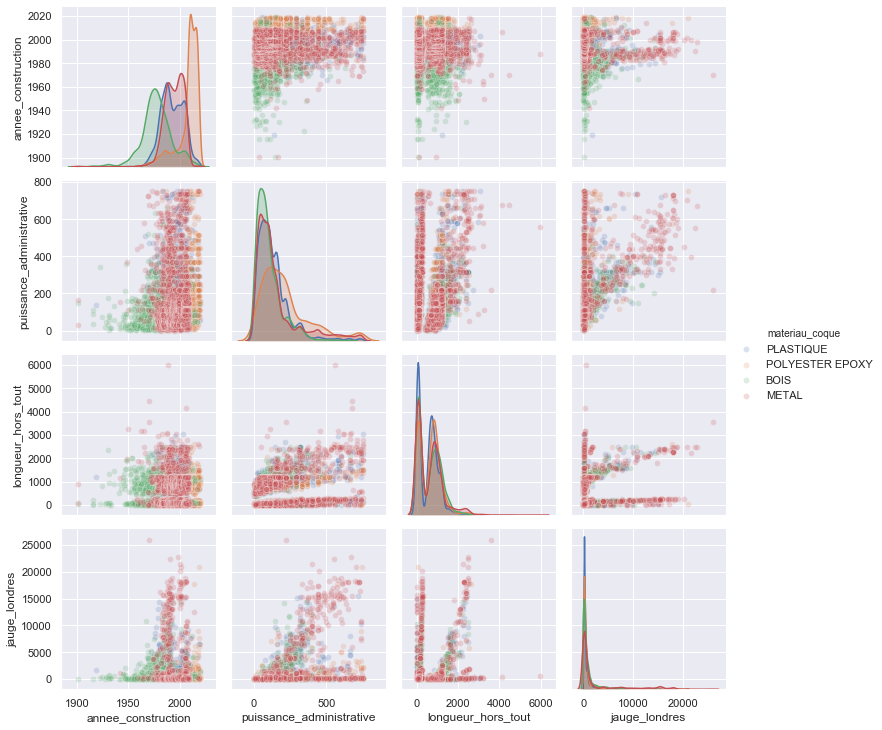

<Figure size 432x288 with 0 Axes>

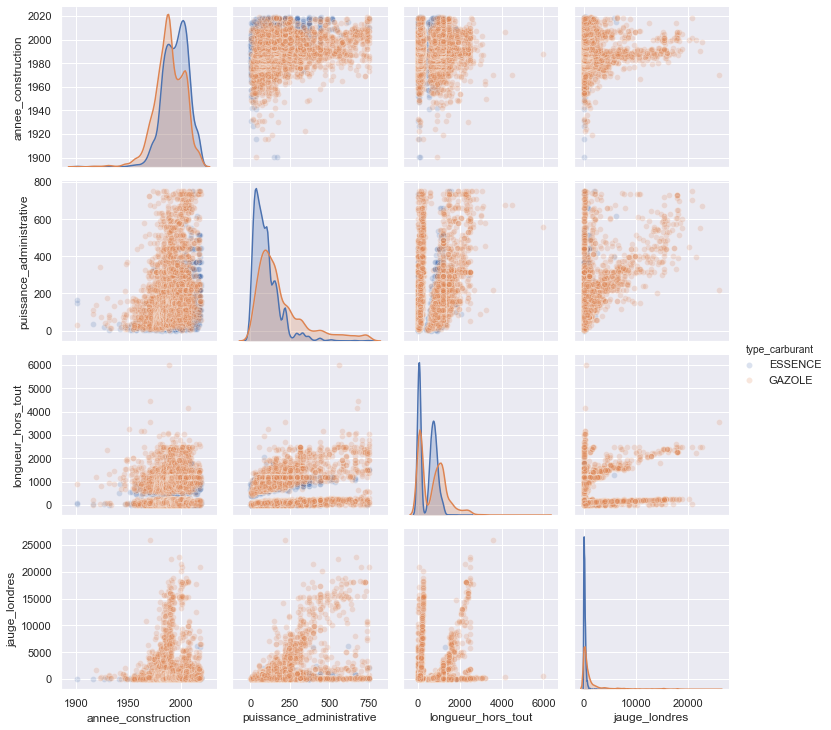

In [40]:
category_columns = ["materiau_coque", "type_carburant"]
for col in category_columns:
    sns.set()
    cols = ['annee_construction', 'puissance_administrative', 'longueur_hors_tout', 'jauge_londres', "materiau_coque", "type_carburant"]
    plt.figure()
    sns.pairplot(data_scatterplot_outlier[cols], hue=col, plot_kws={'alpha':0.2})#, kind='reg', plot_kws={'line_kws':{'color':'red',"lw":1}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

We can again see the differents clusters of materieu_coque used in the annee_construction line.

Bellow I draw my own reg linesSo we can see there is still a tendancy and a correlation between :
longueur_hors_tout and jauge_londre
jauge_londre and puissance administrative. 


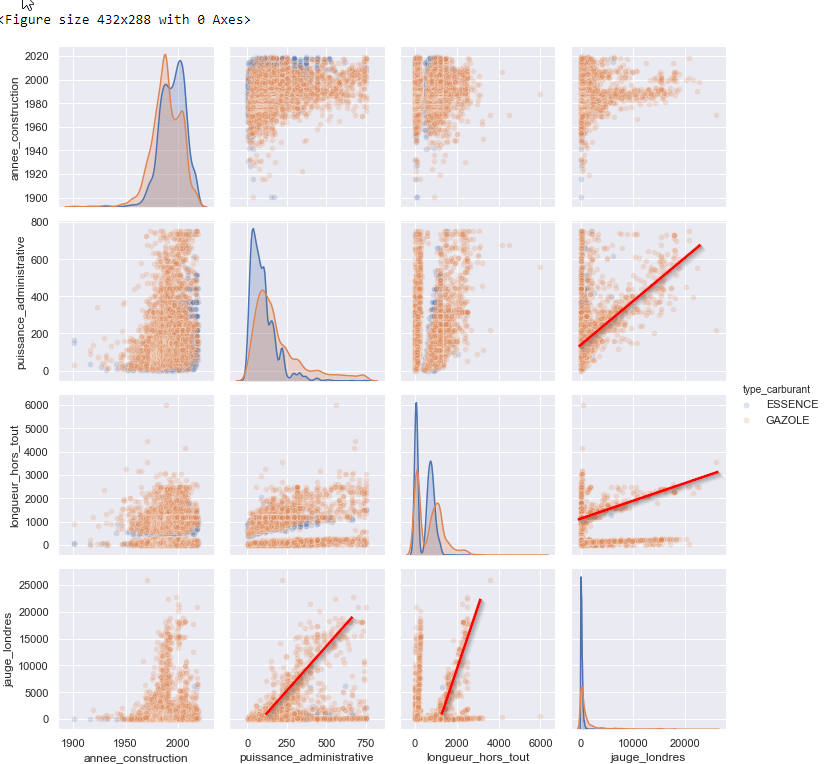

In [42]:
#Display Image
from IPython.display import Image
Image("scatter.png")

But there is also the others dots concentarted on the edge. Here we need to investigate more. May be we can features engineering and find categories that can explain this differents behaviour. 
(Image bellow for a dummy example of the possible clustering)


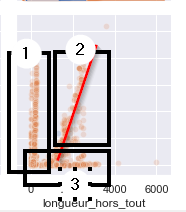

In [43]:
#Display Image
from IPython.display import Image
Image("scatter2.png")

During our analysis we identified that 
jauge_londres, puissance_administrative, longueur_hors_tout 
were right-skewed, and so we can log transform them into a normal distribution.

In [62]:
data_log = data_scatterplot_outlier.copy()

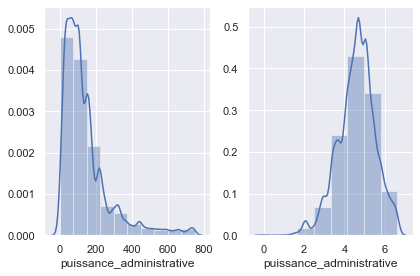

In [63]:
fig, ax = plt.subplots(1,2)

sns.distplot(data_log["puissance_administrative"], bins=10,ax=ax[0])

data_log["puissance_administrative"] = np.log1p(data_log["puissance_administrative"])

sns.distplot(data_log["puissance_administrative"], bins=8,ax=ax[1])

plt.tight_layout()

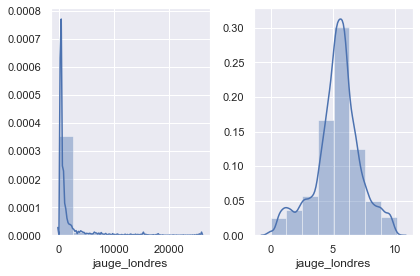

In [64]:
fig, ax = plt.subplots(1,2)

sns.distplot(data_log["jauge_londres"], bins=10,ax=ax[0])

data_log["jauge_londres"] = np.log1p(data_log["jauge_londres"])

sns.distplot(data_log["jauge_londres"], bins=8,ax=ax[1])


plt.tight_layout()

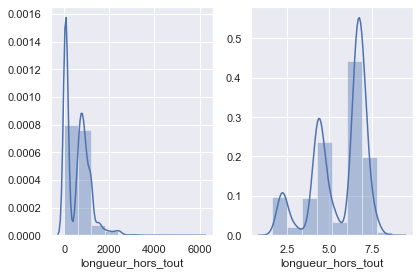

In [65]:
fig, ax = plt.subplots(1,2)

sns.distplot(data_log["longueur_hors_tout"], bins=10,ax=ax[0])

data_log["longueur_hors_tout"] = np.log1p(data_log["longueur_hors_tout"])

sns.distplot(data_log["longueur_hors_tout"], bins=8,ax=ax[1])

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

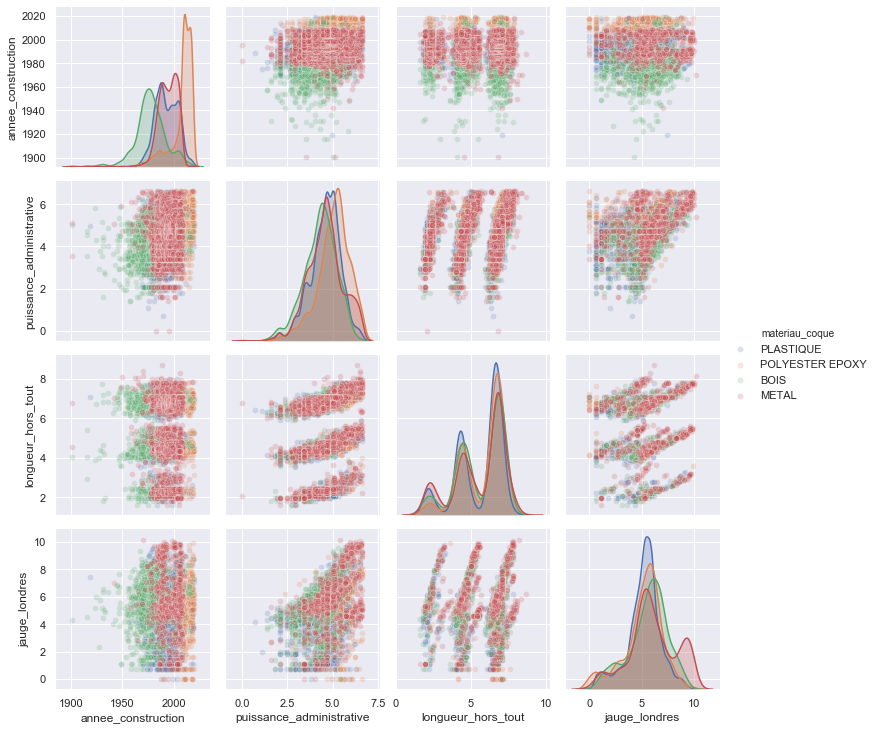

<Figure size 432x288 with 0 Axes>

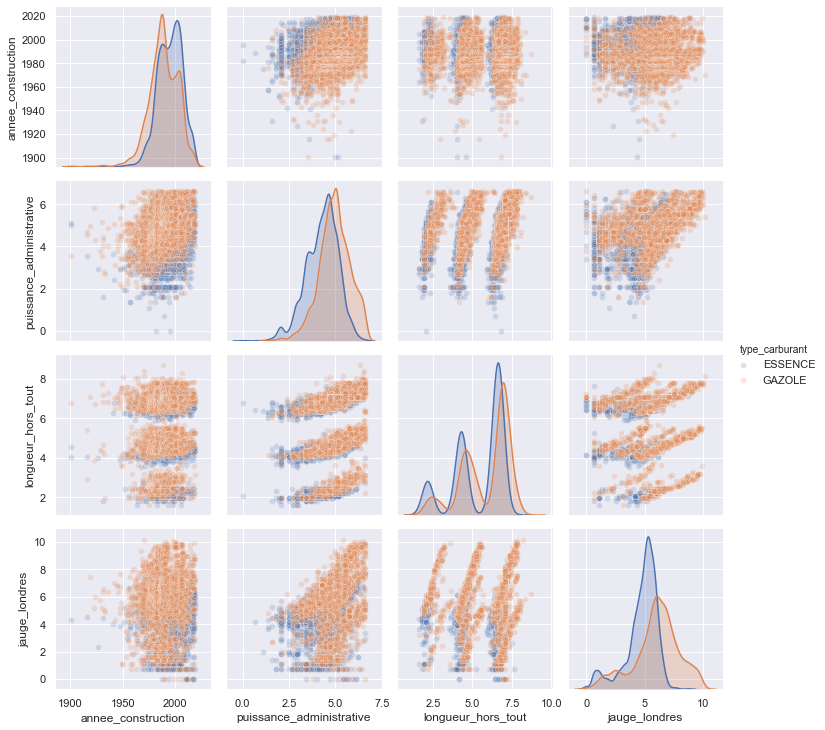

In [66]:
category_columns = ["materiau_coque", "type_carburant"]
for col in category_columns:
    sns.set()
    cols = ['annee_construction', 'puissance_administrative', 'longueur_hors_tout', 'jauge_londres', "materiau_coque", "type_carburant"]
    plt.figure()
    sns.pairplot(data_log[cols], hue=col, plot_kws={'alpha':0.2})#, kind='reg', plot_kws={'line_kws':{'color':'red',"lw":1}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

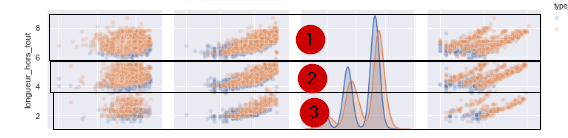

In [67]:
#Display Image
from IPython.display import Image
Image("scatter3.png")

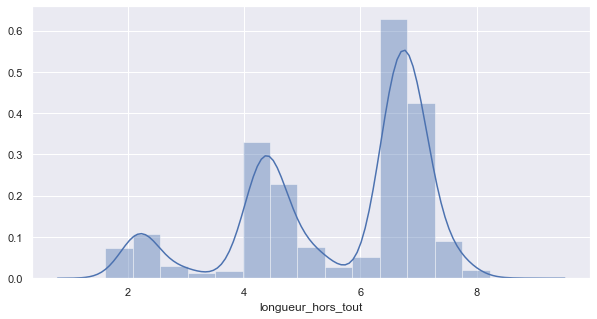

In [70]:
plt.figure(figsize=(10,5))
sns.distplot(data_log["longueur_hors_tout"], bins=15)

We can identify three cluster. We should investigate this and possibly create a categorical feature with 3 categories to highlight this data information. 

In [76]:
#Creation new feature cat_longueur_hors_tout based on longueur_hors_tout
def cluster_longueur_hors_tout(long):
    if long <= 3:
        return 0
    elif long <= 6:
        return 1
    else:
        return 3
data_log["cat_longueur_hors_tout"] = data_log["longueur_hors_tout"].apply(cluster_longueur_hors_tout)
data_log.head()


,annee_construction,puissance_administrative,longueur_hors_tout,jauge_londres,materiau_coque,type_carburant,cat_longueur_hors_tout
num_immat_francais,,,,,,,
104641,1971,3.637586,6.403574,5.451038,PLASTIQUE,ESSENCE,3
142359,1972,4.997212,6.669498,6.156979,PLASTIQUE,GAZOLE,3
149253,1970,4.867534,4.276666,4.919981,POLYESTER EPOXY,GAZOLE,1
153384,1968,4.997212,4.382027,6.049733,PLASTIQUE,ESSENCE,1
153893,1967,4.317488,6.885510,5.814131,PLASTIQUE,GAZOLE,3


### I stop here but there is a lot to do on this dataset !